# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv('clean_churn_data.csv')
df

,Unnamed: 0,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges
0,0,7590-VHVEG,1,0,0,1,29.85,29.85,0,29.850000
1,1,5575-GNVDE,34,1,1,0,56.95,1889.50,0,55.573529
2,2,3668-QPYBK,2,1,0,0,53.85,108.15,1,54.075000
3,3,7795-CFOCW,45,0,1,2,42.30,1840.75,0,40.905556
4,4,9237-HQITU,2,1,0,1,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,24,1,1,0,84.80,1990.50,0,82.937500
7039,7039,2234-XADUH,72,1,1,3,103.20,7362.90,0,102.262500
7040,7040,4801-JZAZL,11,0,0,1,29.60,346.45,0,31.495455
7041,7041,8361-LTMKD,4,1,0,0,74.40,306.60,1,76.650000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7043 non-null   int64  
 1   customerID         7043 non-null   object 
 2   tenure             7043 non-null   int64  
 3   PhoneService       7043 non-null   int64  
 4   Contract           7043 non-null   int64  
 5   PaymentMethod      7043 non-null   int64  
 6   MonthlyCharges     7043 non-null   float64
 7   TotalCharges       7043 non-null   float64
 8   Churn              7043 non-null   int64  
 9   AvgMonthlyCharges  7032 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 550.4+ KB


In [4]:
df.dropna(inplace=True)

# Decision Tree

In [5]:
# break our data into features and targets, and train and test sets

feature = df.drop(['Churn','customerID','Unnamed: 0'], axis=1) #axis : Whether to drop labels from the index (0 or 'index') orcolumns (1 or 'columns').
target = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify= target, random_state= 42)

In [6]:
feature

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlyCharges
0,1,0,0,1,29.85,29.85,29.850000
1,34,1,1,0,56.95,1889.50,55.573529
2,2,1,0,0,53.85,108.15,54.075000
3,45,0,1,2,42.30,1840.75,40.905556
4,2,1,0,1,70.70,151.65,75.825000
...,...,...,...,...,...,...,...
7038,24,1,1,0,84.80,1990.50,82.937500
7039,72,1,1,3,103.20,7362.90,102.262500
7040,11,0,0,1,29.60,346.45,31.495455
7041,4,1,0,0,74.40,306.60,76.650000


In [7]:
# use sklearn to fit a decision tree to the training data
# with max depth of 5
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [8]:
# no max depth
dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
print(dr.score(x_train,y_train))
print(dr.score(x_test, y_test))

0.9945013272658324
0.7224118316268487


In [10]:
# max depth 3
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7864998103905954
0.7753128555176336


In [11]:
# plot the decision tree
# change the max_depth of the decision tree to improve the
# model if needed (or tune it with a hyperparameter search)

dt.get_depth()

3

In [12]:
dr.get_depth()

24

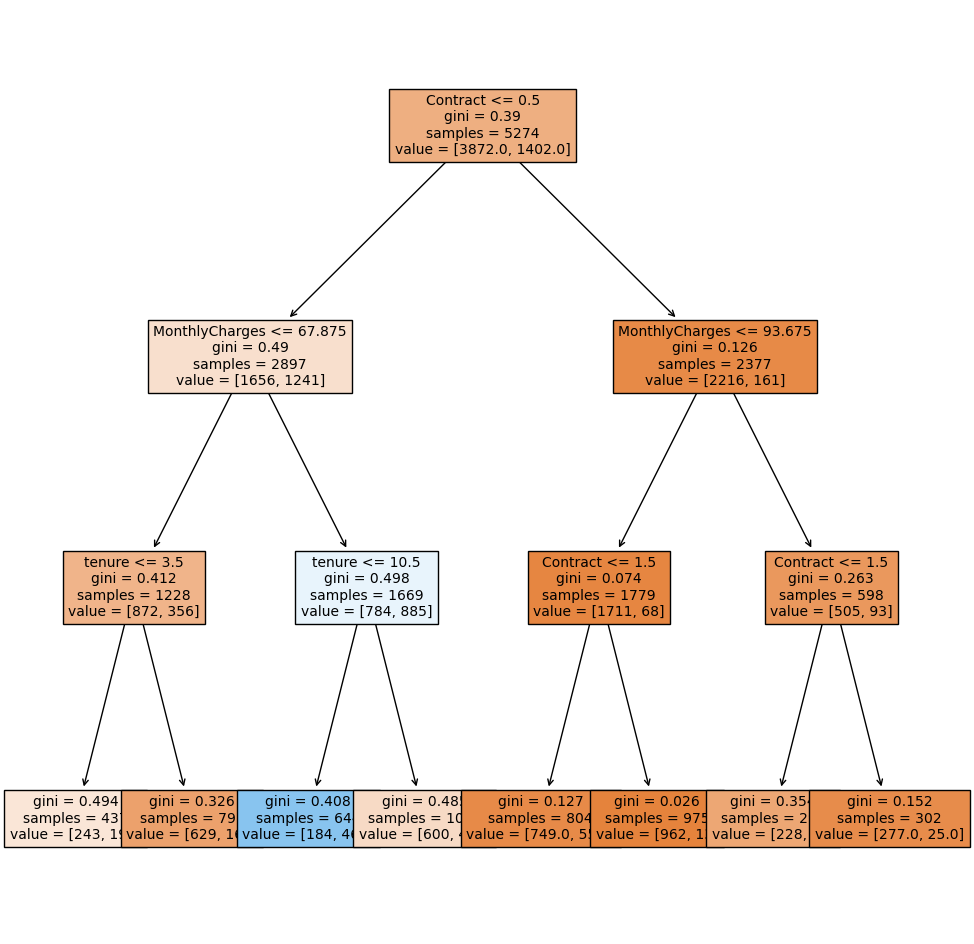

In [13]:
# need to zoom in to see
# max depth 3
f = plt.figure(figsize =(12,12))
_ = plot_tree(dt, fontsize=10, feature_names=feature.columns, filled=True)

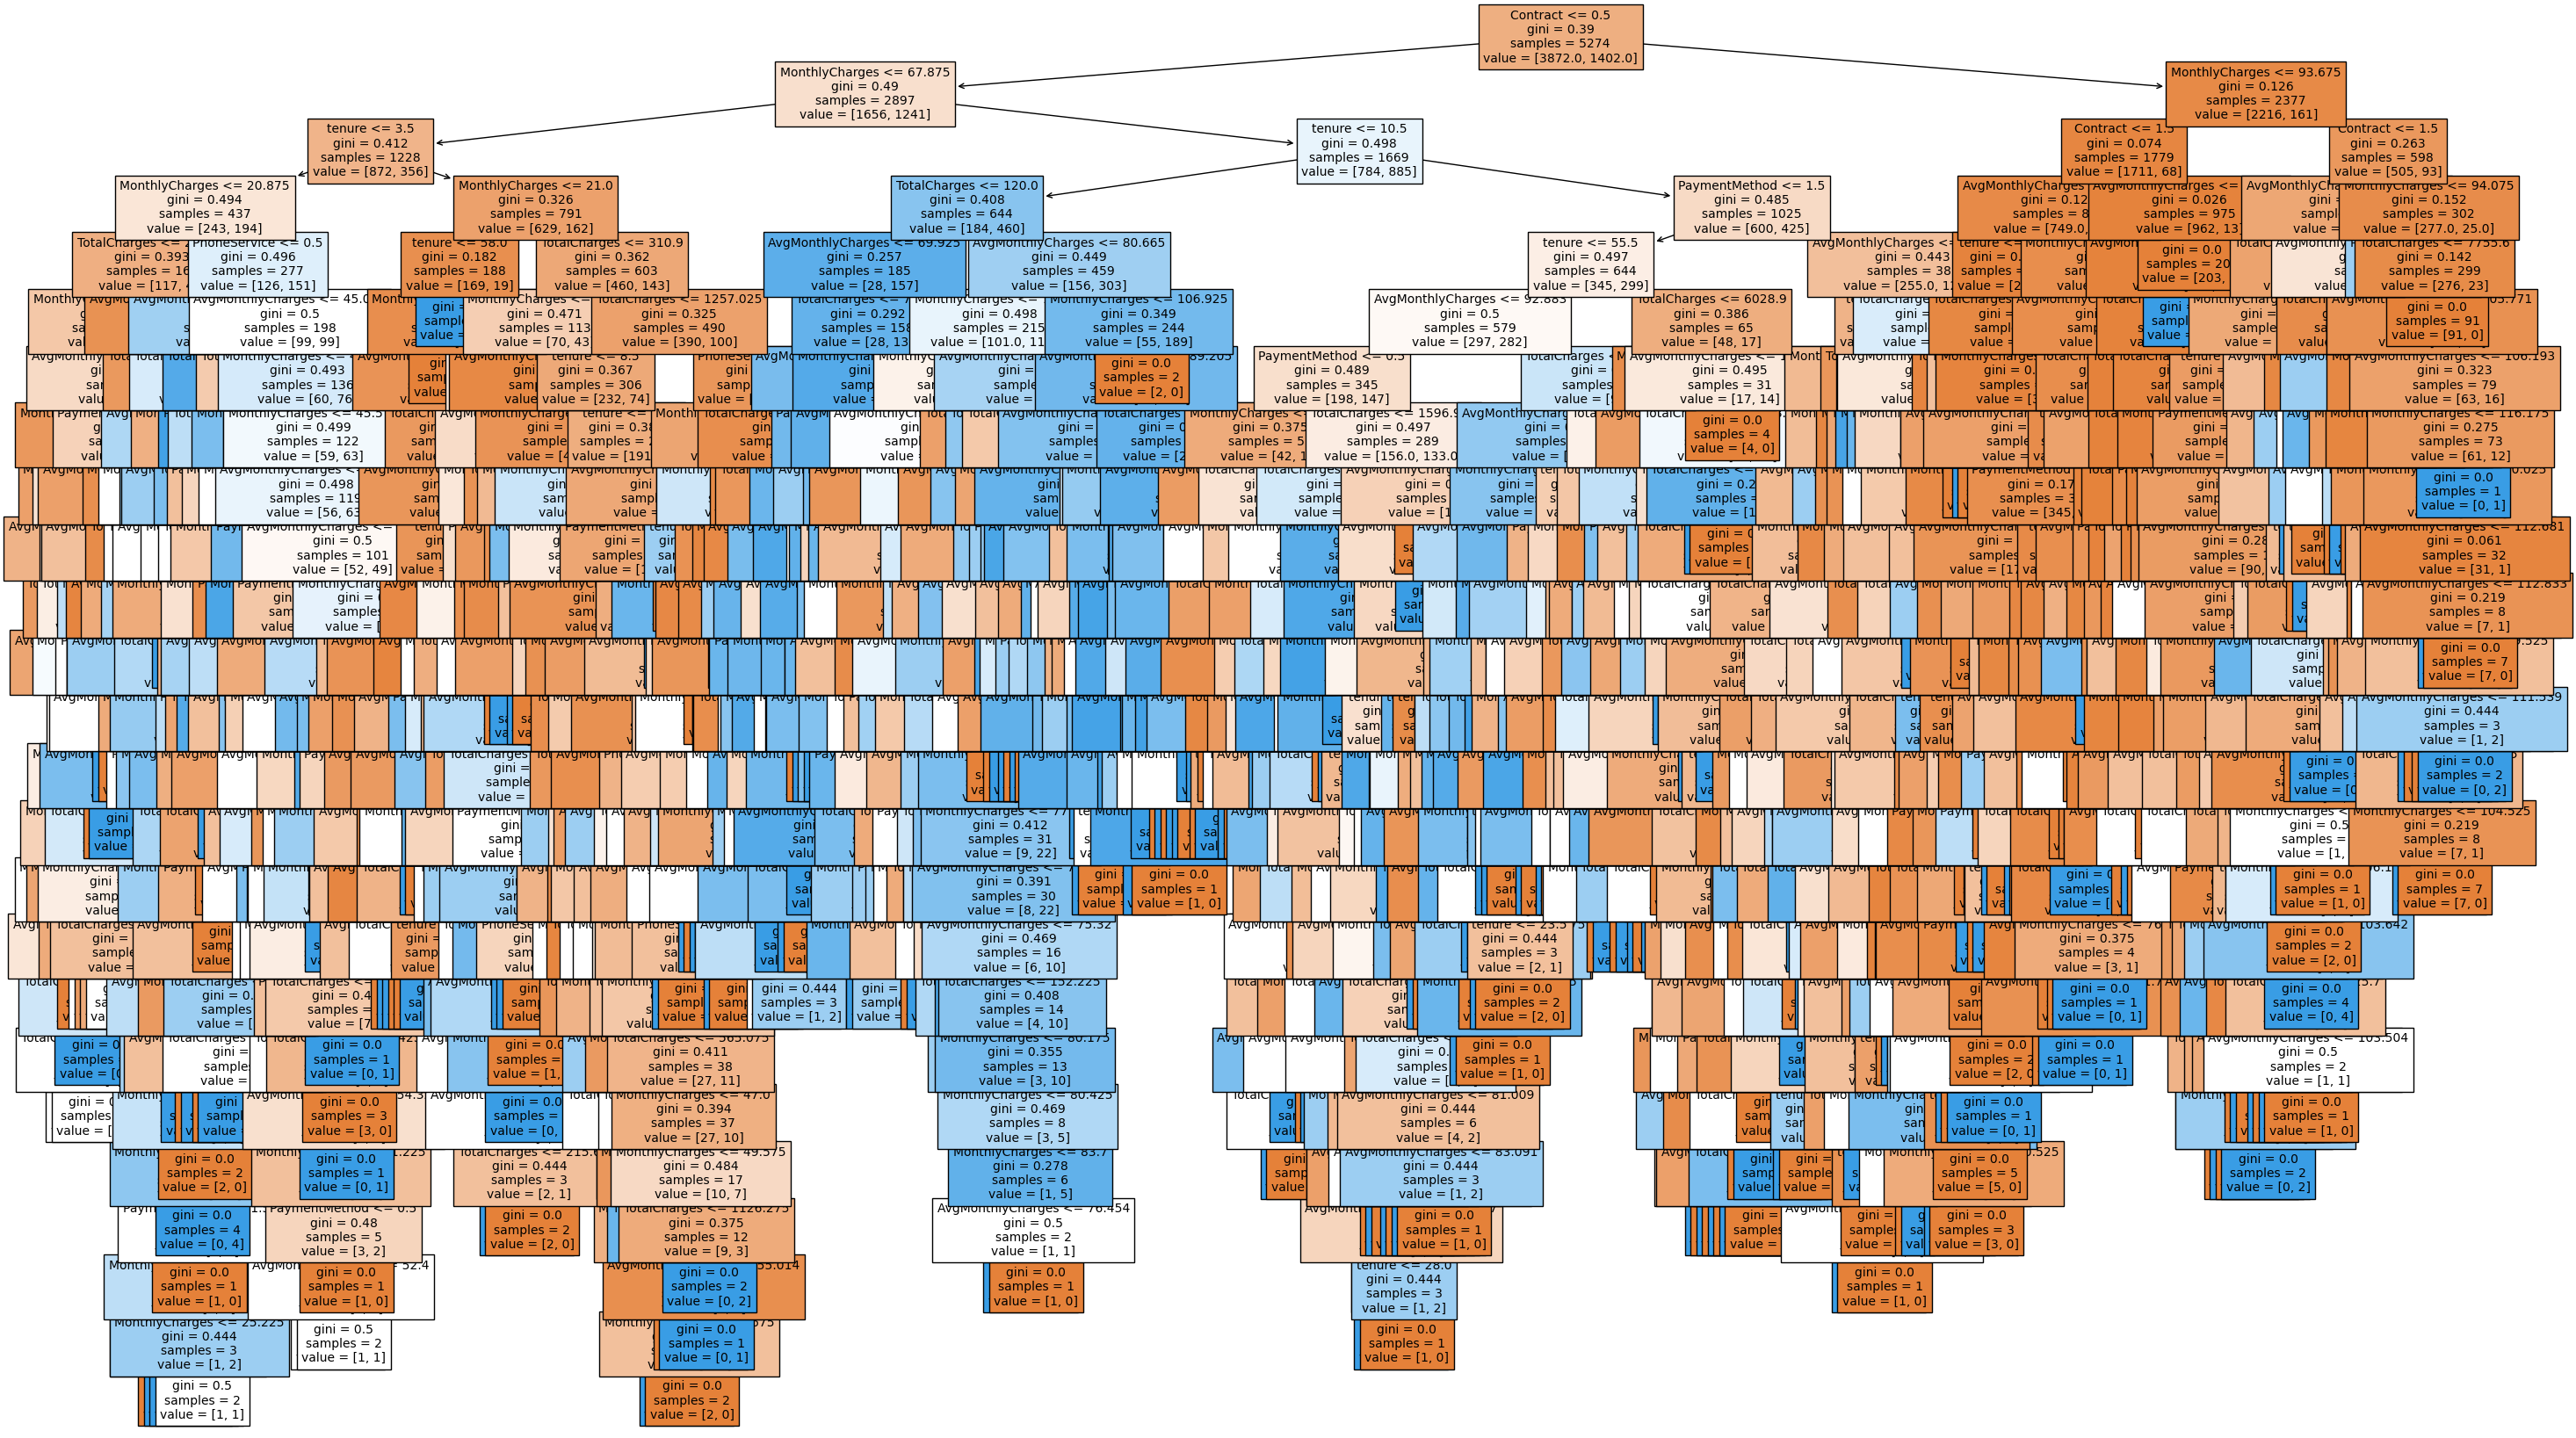

In [14]:
f = plt.figure(figsize=(35,21))
_ = plot_tree(dr, fontsize = 10, feature_names= feature.columns, filled=True)

In [15]:
# plot the correlations between features and targets

In [16]:
import seaborn as sns


In [17]:
#correlation_matrix = feature.corrwith(target)
df_new = df.drop(['customerID','Unnamed: 0'], axis =1)

<Axes: >

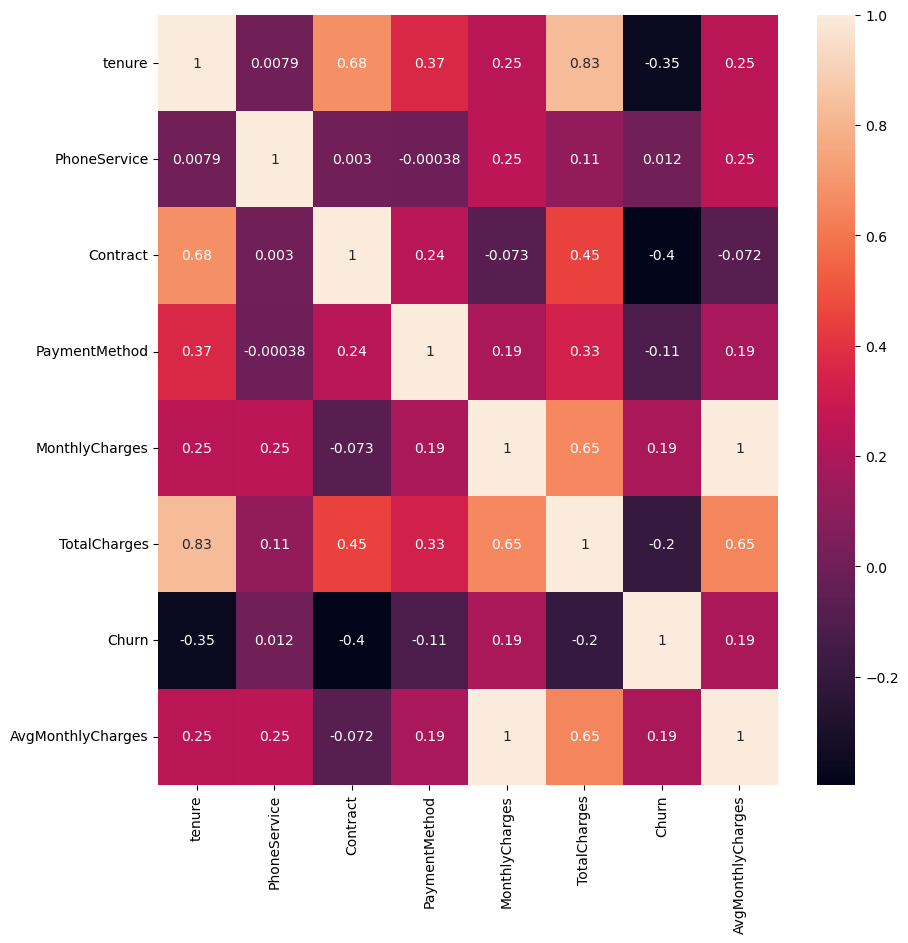

In [18]:
f = plt.figure(figsize= (10,10))
sns.heatmap(df_new.corr(), annot = True)


# Randomforest

In [19]:
# use sklearn to fit a random forest model to predict churn 
# from our dataset
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(max_depth = 5, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [21]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test, y_test))
# overfitting is present

0.806977626090254
0.7912400455062572


In [22]:
# fixed overfitting problem
# simlar accuracy rate as the above 1 decsion tree only
rfc = RandomForestClassifier(max_depth = 3, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test, y_test))

0.7923777019340159
0.7821387940841866


In [23]:
import math

math.sqrt(x_train.shape[1])

2.6457513110645907

In [24]:
# improve performance
# doesnt improve performance by mush

In [25]:
rfc = RandomForestClassifier(max_depth = 3,max_features=3, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test, y_test))

0.7942737959802806
0.7838452787258248


In [26]:
# feature importance
# plot the feature importances from the random forest

In [27]:
#!pip install scikit-plot

<Axes: title={'center': 'Feature Importance'}>

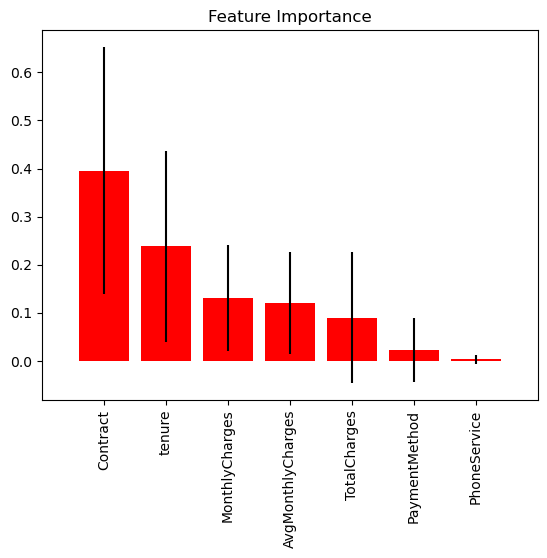

In [29]:
# changes everytime you run the code
from scikitplot.estimators import plot_feature_importances
plot_feature_importances(rfc, feature_names=feature.columns, x_tick_rotation=90)

In [30]:
#choose some of the less-important features to remove from the 
# model using feature importances and correlations and fit the 
# random forest model to the new data
# examine the feature importances after removing less important features

In [31]:
new = feature.drop(['PaymentMethod'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new, target,stratify=target, random_state=42)

In [199]:
# didnt imporve 
rfc = RandomForestClassifier(max_depth = 3,max_features=6, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test, y_test))

0.7893439514599924
0.782707622298066


# Summary

In this analysis, we utilize Decision Tree ML and Random Forest ML. In the first section, we employ Decision Tree to predict churn for our test data. We observe that without a specified max depth in our Decision Tree function, the accuracy for our train data is high compared to when we use a specified depth of 3. However, we notice a significant gap between the accuracy of our train data and our test data when not specifying the max depth. With a max depth of 3, though, we find that there isn't a major discrepancy in accuracy between our train and test data.

Following that, I created a correlation matrix to determine significant variables. From the matrix, it's evident that variables like monthly charge and average monthly charge are significant for our churn prediction. After examining the correlation matrix, we proceed with a random forest analysis. In this analysis, we follow similar steps as with our decision tree, but this time we specify the max depth and random state (max_depth = 5, random_state=42).

Upon reviewing the accuracy scores from our initial trial, we notice a slight overfitting issue. To address this, we attempt to lower the max depth and add a maximum number of features. While this adjustment makes a small difference, it isn't significant compared to our original test. Next, we attempt to enhance our accuracy rate by identifying the least important features, allowing us to remove them from our feature variable. Despite these efforts, we still don't observe a major difference in accuracy rates compared to before, though our accuracy rates are now within the same range.

In my final analysis, I conclude that achieving a final accuracy of 78.93% with the Random Forest model is satisfactory, considering that our test data falls within the same range. However, I believe there is room for improvement in our training data to achieve a higher score

Be sure to write a summary of your work and explain the results.

# Optional advanced tasks: